<a href="https://colab.research.google.com/github/shalinisanagavarapu/crop_yield_prediction/blob/code/Team_2_Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CROP YIELD PREDICTION**<br>
**Problem Statement:**<br>
 Implement a machine learning model to predict crop yields based on climate conditions, soil quality, and historical agricultural data. <br>

**Business Understanding:**<br>
The crop yield prediction project aims to leverage machine learning techniques to provide valuable insights in the agricultural sector. By analyzing climate conditions, soil quality, and historical agricultural data, the goal is to assist farmers in making informed decisions related to crop production. This project seeks to address the challenges faced by farmers in optimizing crop yields and aims to offer benefits such as increased productivity.<br>

**Present Situation:**
* Predicting crop yields often relies on traditional methods and manual analysis, which may have limitations in accuracy and scalability.
* In the present times, with the integration of modern technology and data science techniques crop yield prediction has become easier. Some of the methods commonly used today are Machine Learning Models, Remote Sensing, Crop Simulation Models, Sensor Technology, etc.<br>

**Determining Goals:**
* Our main goal is to build a model that can accurately predict crop yields, and make it available for farmers to use.
* This model aims to provide practical solutions for farmers and enable decision-making to increase their crop yield.
<br>

**Developing a Project Plan:**
*  The project plan encompasses several key phases, including data collection and preprocessing, model development, deployment, testing.
*   During the data collection phase, relevant datasets on climate, soil, and historical agricultural data will be gathered and cleaned.
* Machine learning models will be developed, trained, and evaluated using appropriate algorithms and techniques.
*Testing and validation will be conducted throughout the project lifecycle to ensure accuracy, reliability.
*The deployment involves implementing the models into a production environment, such as a web application or API, for stakeholders to access and utilize.

**Dataset:**
1. https://www.kaggle.com/datasets/sriharikatare/indian-crop-production?resource=download


Saving download.png to download.png


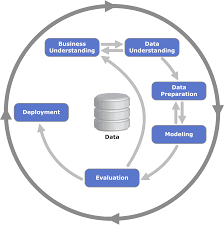

In [ ]:
from google.colab import files
from IPython.display import Image

def upload_image():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    return file_name

# Upload the image file directly without prompt
image_file = upload_image()

# Display the image with increased size
Image(image_file, width=400, height=400)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d sriharikatare/indian-crop-production

  0% 0.00/2.04M [00:00<?, ?B/s]
100% 2.04M/2.04M [00:00<00:00, 151MB/s]


In [ ]:
import zipfile
file_path = '/content/indian-crop-production.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/kaggle/Crop_production.csv')
data

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99844,99844,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.280000,2013.0,5152.0,2.559364
99845,99845,west bengal,summer,maize,80,40,20,5.68,182.50,29.200000,258.0,391.0,1.515504
99846,99846,west bengal,summer,rice,80,40,40,5.64,182.50,29.200000,105.0,281.0,2.676190
99847,99847,west bengal,rabi,rice,80,40,40,5.42,152.54,22.280000,152676.0,261435.0,1.712352


There are 13 columns in the dataset. It includes 3 Categorical attributes and 10 Numerical attributes(including Serial Number).

The Categorical Attributes are:
1.   State_Name
2.   Crop_Type
3.   Crop

The Numerical Attributes are:
1.   N (Integer)
2.   P (Integer)
3.   K (Integer)
4.   pH (Float)
5.   rainfall (Float)
6.   temperature (Float)
7.   Area_in_hectares (Float)
8.   Production_in_tons (Float)
9.   Yield_ton_per_hec (Float)

















In [ ]:
# importing all necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

The above-mentioned libraries have been imported to facilitate various tasks such as data handling, visualization, and machine learning in the project.

**pandas:** It is used for data manipulation and analysis. It helps in handling structured data like tables, making tasks such as loading data, cleaning, filtering, and summarizing data much easier.

**numpy:** It is fundamental for numerical computing in Python. It provides support for large arrays and matrices along with a collection of mathematical functions to operate on these arrays.

**matplotlib.pyplot:** It is a powerful plotting library in Python. It enables you to create various types of plots, charts, and graphs to visualize the data.

**seaborn:** It is built on top of Matplotlib and specializes in statistical data visualization. It provides high-level interfaces for creating visually appealing and informative statistical graphics.

**sklearn.model_selection.train_test_split:** This function is crucial for splitting the dataset into training and testing sets. It ensures that the models are tested on unseen data, helping to assess the generalization ability.

**sklearn.preprocessing.StandardScaler:** It is used for feature scaling, a preprocessing step in machine learning. It standardizes the features by removing the mean and scaling to unit variance.

**sklearn.ensemble.RandomForestRegressor:** RandomForestRegressor is an ensemble learning method used for regression tasks. It constructs multiple decision trees during training and outputs the average prediction of individual trees.

**sklearn.metrics.mean_squared_error:** Mean squared error (MSE) is a metric used to evaluate the performance of regression models. It measures the average squared difference between the predicted and actual values.

**sklearn.metrics.r2_score:** R-squared (R^2) is another metric for evaluating regression models. It represents the proportion of the variance in the dependent variable that is explained by the independent variables.


In [ ]:
# Display basic information about the dataset
print("Dataset information:")
data.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [ ]:
# Display the first few five of the dataset
print("\nFirst few rows of the dataset:")
data.head()


First few rows of the dataset:


,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [ ]:
# Display the last five rows of the dataset
print("\nLast few rows of the dataset:")
data.tail()


Last few rows of the dataset:


,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
99844,99844,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.28,2013.0,5152.0,2.559364
99845,99845,west bengal,summer,maize,80,40,20,5.68,182.50,29.20,258.0,391.0,1.515504
99846,99846,west bengal,summer,rice,80,40,40,5.64,182.50,29.20,105.0,281.0,2.676190
99847,99847,west bengal,rabi,rice,80,40,40,5.42,152.54,22.28,152676.0,261435.0,1.712352
99848,99848,west bengal,rabi,sesamum,30,15,30,6.54,152.54,22.28,244.0,95.0,0.389344


In [ ]:
# Display the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(99849, 13)


In [ ]:
# Summary statistics for categorical variables
print("\nSummary statistics for categorical variables:")
data.describe(include=['object'])


Summary statistics for categorical variables:


,State_Name,Crop_Type,Crop
count,99849,99849,99849
unique,33,4,53
top,uttar pradesh,kharif,rice
freq,12598,38758,11430


In [ ]:
# Summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
data.describe(include=[np.number])


Summary statistics for numerical variables:


,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
count,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,9.984900e+04,99849.000000
mean,49924.000000,69.816823,41.593656,42.037827,5.643624,701.151085,26.684154,16476.585668,3.776291e+04,3.931149
std,28824.067851,39.571469,15.056508,28.430263,0.505283,604.701552,4.851214,43604.268231,1.222447e+05,33.872242
min,0.000000,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000
25%,24962.000000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.620000e+02,0.586207
50%,49924.000000,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.506000e+03,1.329268
75%,74886.000000,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8099.000000,1.439500e+04,2.997288
max,99848.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000


In [ ]:
# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in data.select_dtypes(include='object').columns:
    print(f"Column: {column}")
    print(data[column].unique())


Unique values in categorical columns:
Column: State_Name
['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'goa' 'gujarat'
 'haryana' 'jammu and kashmir' 'karnataka' 'kerala' 'madhya pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'punjab' 'rajasthan' 'tamil nadu' 'telangana' 'uttar pradesh'
 'west bengal' 'chandigarh' 'dadra and nagar haveli' 'himachal pradesh'
 'puducherry' 'sikkim' 'tripura' 'andaman and nicobar islands'
 'chhattisgarh' 'uttarakhand' 'jharkhand']
Column: Crop_Type
['kharif' 'rabi' 'summer' 'whole year']
Column: Crop
['cotton' 'horsegram' 'jowar' 'maize' 'moong' 'ragi' 'rice' 'sunflower'
 'wheat' 'sesamum' 'soyabean' 'rapeseed' 'jute' 'arecanut' 'onion'
 'potato' 'sweetpotato' 'tapioca' 'turmeric' 'barley' 'banana' 'coriander'
 'garlic' 'blackpepper' 'cardamom' 'cashewnuts' 'blackgram' 'coffee'
 'ladyfinger' 'brinjal' 'cucumber' 'grapes' 'mango' 'orange' 'papaya'
 'tomato' 'cabbage' 'bottlegourd' 'pineapple' 'carrot' 'radish'
 'bitte

In [ ]:
# Groupby analysis
print("\nGroupby analysis - Mean production by crop type:")
data.groupby('Crop_Type')['Production_in_tons'].mean()


Groupby analysis - Mean production by crop type:


Crop_Type
kharif        37754.848431
rabi          60463.585538
summer        15435.409494
whole year    20088.891442
Name: Production_in_tons, dtype: float64

In [ ]:
# Check for duplicate rows
print("\nDuplicate rows:")
data[data.duplicated()]


Duplicate rows:


,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec


In [ ]:
# Quantiles
print("\nQuantiles for production:")
data['Production_in_tons'].quantile([0.25, 0.5, 0.75])


Quantiles for production:


0.25      162.0
0.50     1506.0
0.75    14395.0
Name: Production_in_tons, dtype: float64

In [ ]:
# Percentage of total production by crop type
print("\nPercentage of total production by crop type:")
production_percentage = data.groupby('Crop_Type')['Production_in_tons'].sum() / data['Production_in_tons'].sum() * 100
production_percentage


Percentage of total production by crop type:


Crop_Type
kharif        38.808324
rabi          44.203683
summer         2.897064
whole year    14.090928
Name: Production_in_tons, dtype: float64

In [ ]:
# Check for missing values
print("\nMissing values:")
data.isnull().sum()


Missing values:


Unnamed: 0            0
State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

By the above anlaysis,it is observed that there are no Duplicate values and Missing values in the entire dataset choosen.

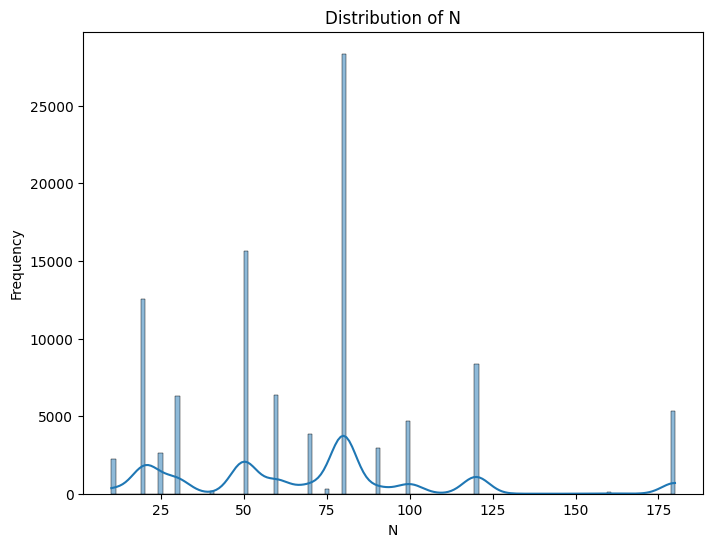

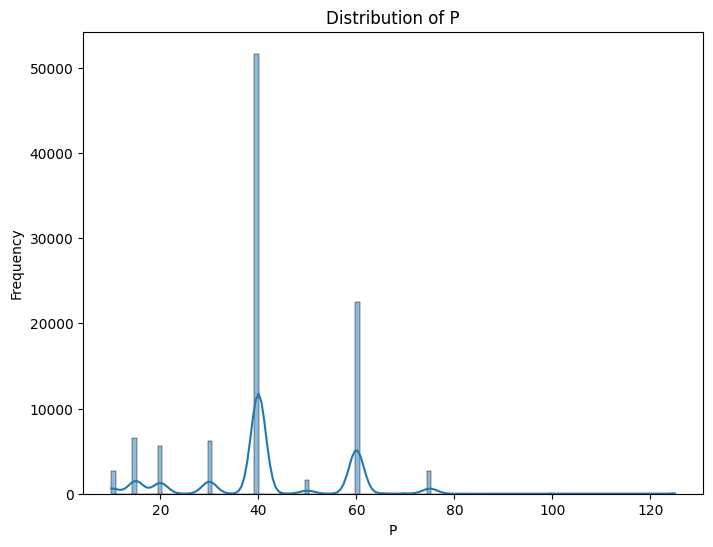

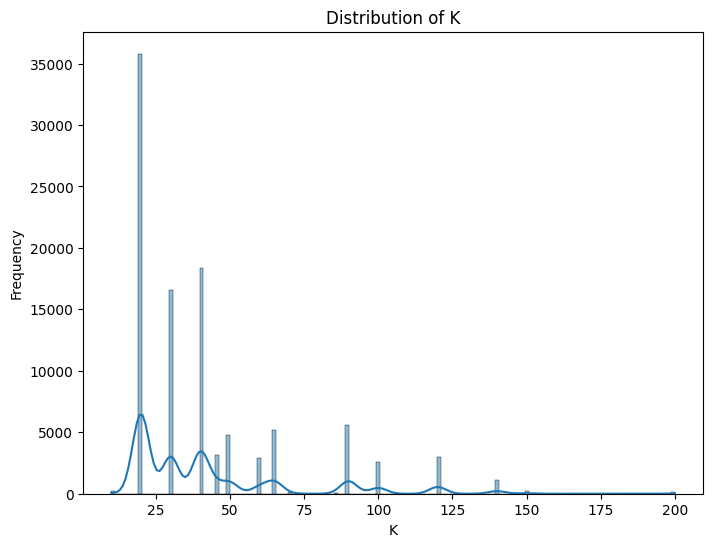

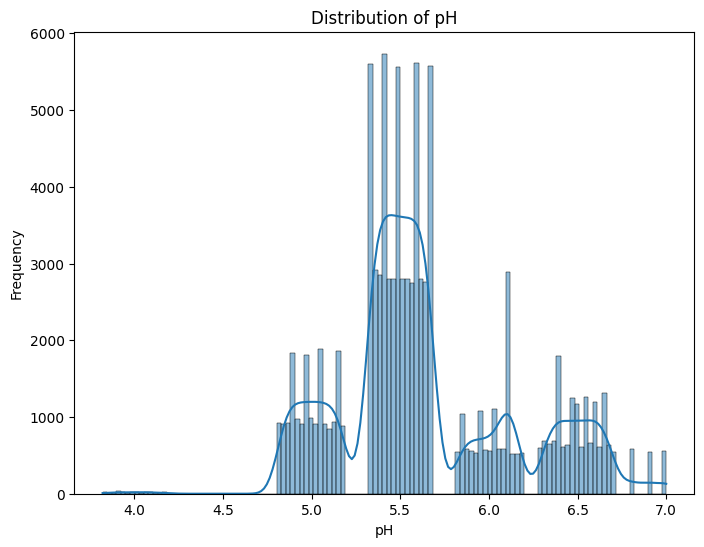

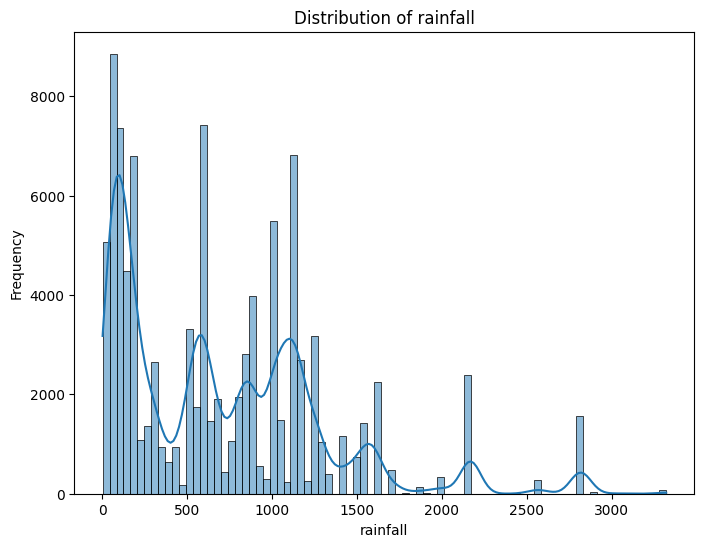

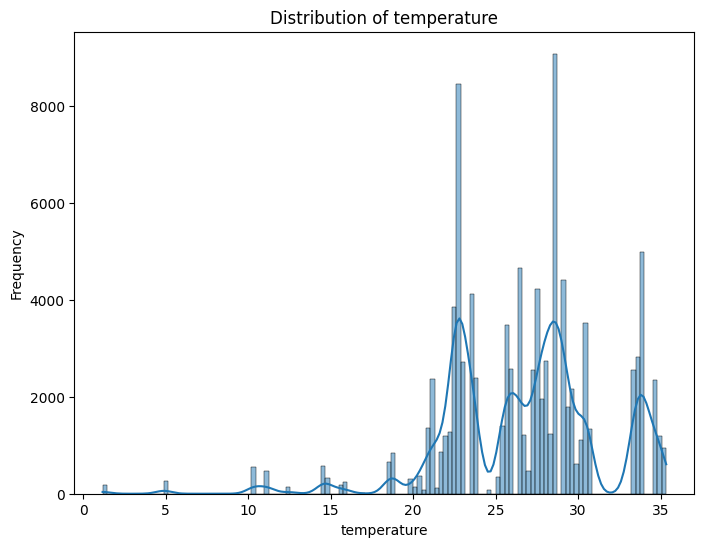

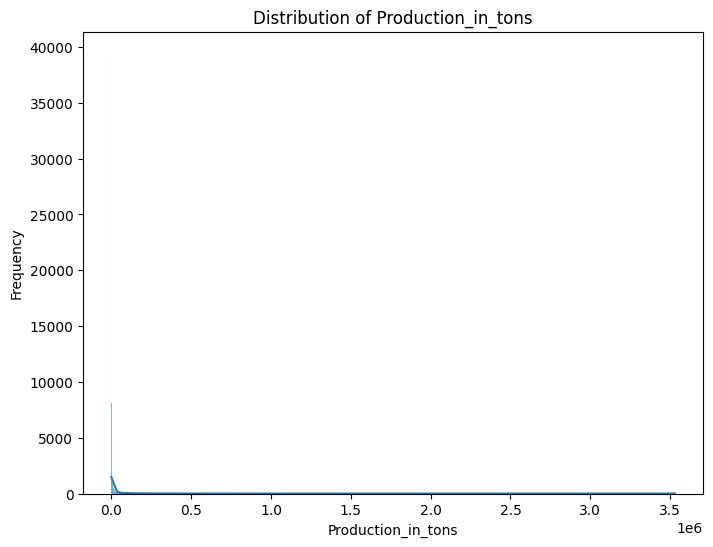

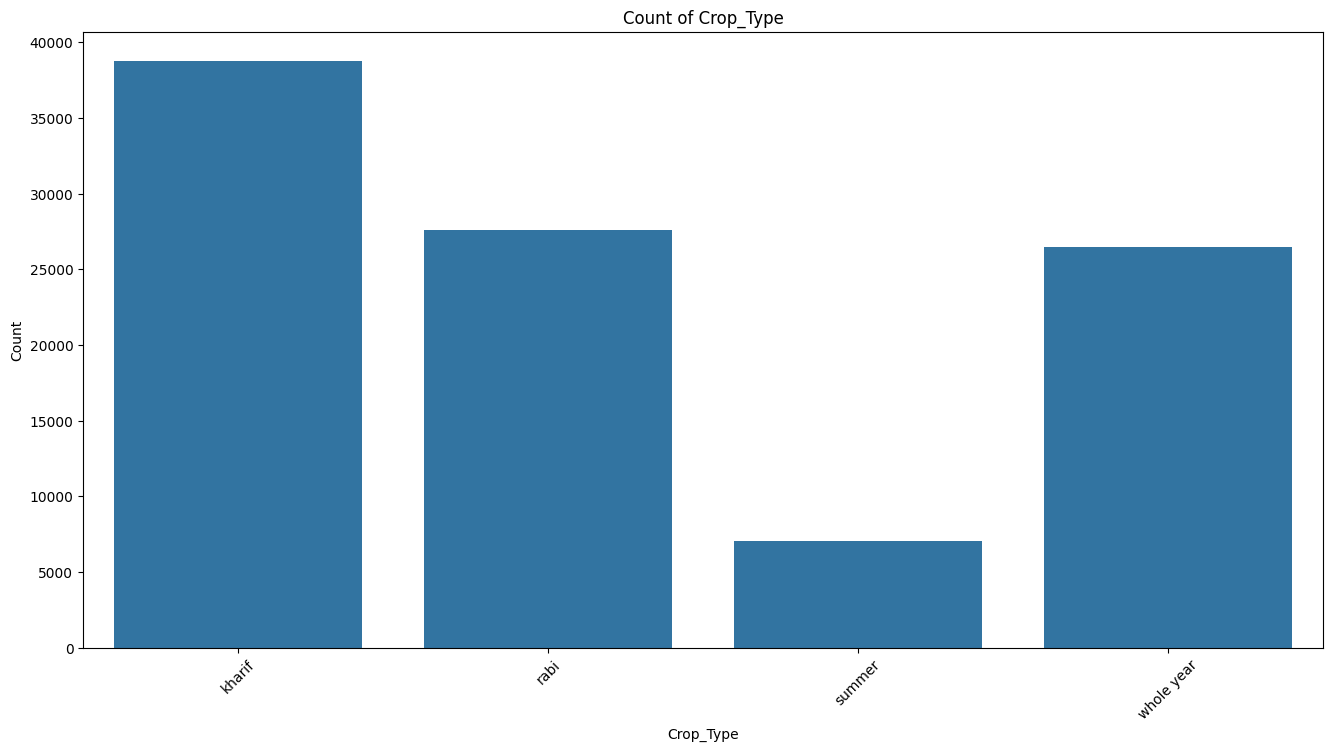

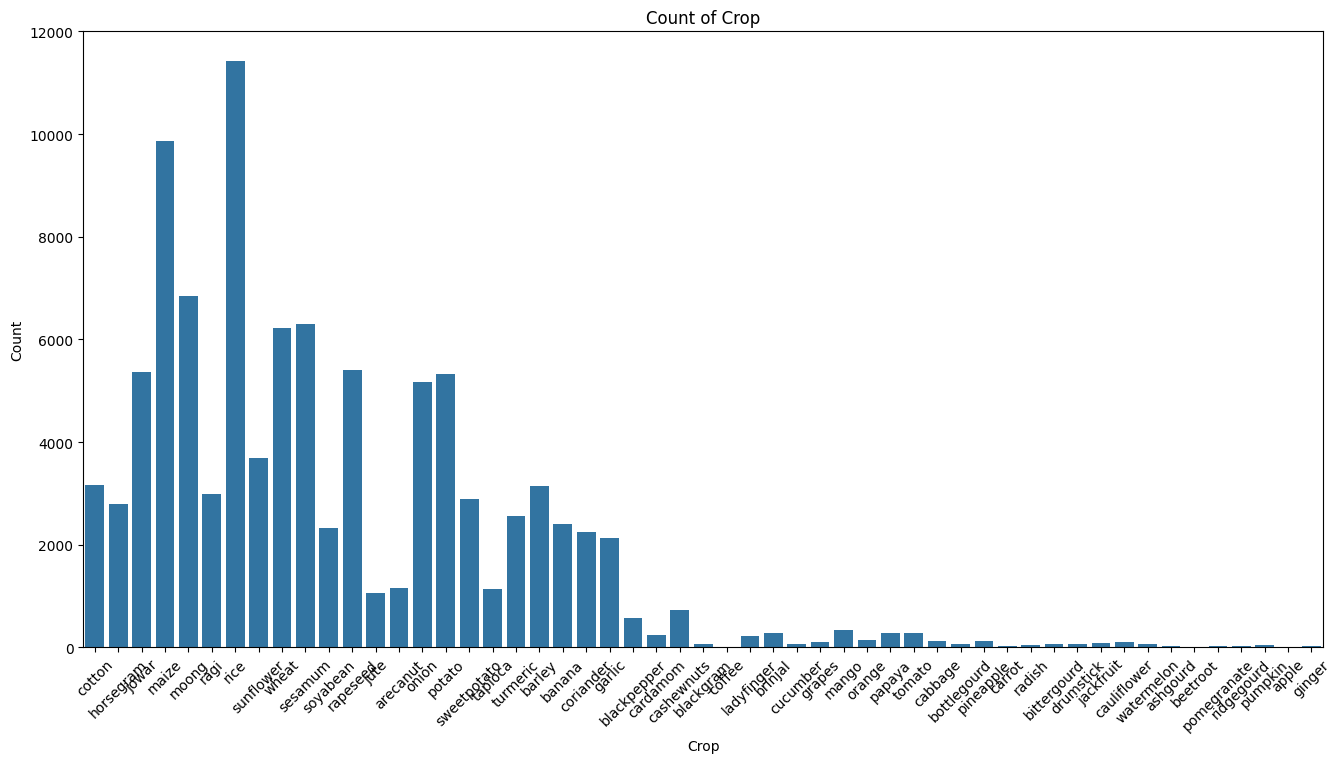

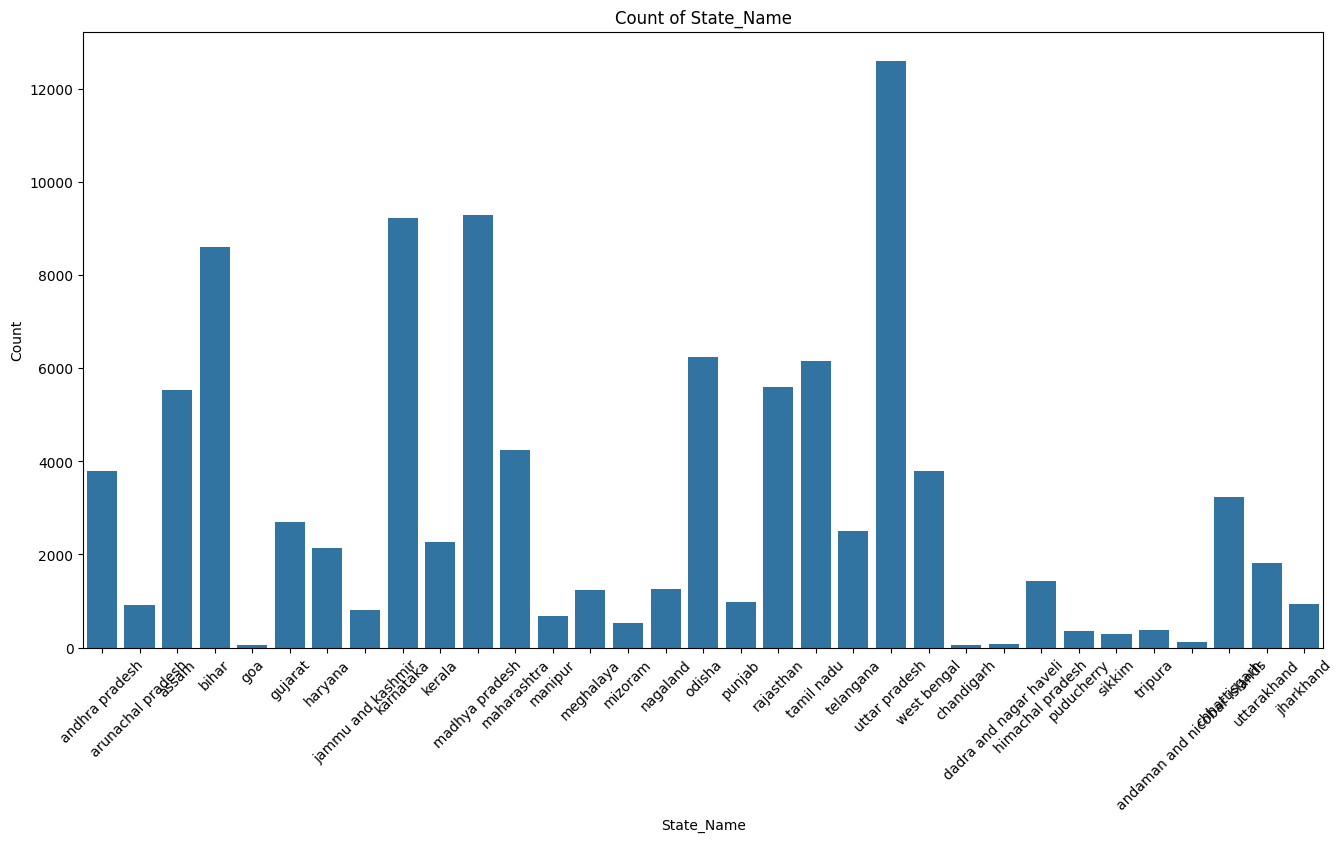

In [ ]:
#Univariate Analysis of attributes
# Numerical attributes for analysis
numerical_attributes = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Production_in_tons']
# Categorical attributes for analysis
categorical_attributes = ['Crop_Type', 'Crop','State_Name']
# Univariate analysis for numerical attributes
for column in numerical_attributes:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
# Univariate analysis for categorical attributes
for column in categorical_attributes:
    plt.figure(figsize=(16, 8))
    sns.countplot(x=column, data=data)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

*From the above Plotted Graphs the Inferences are:*

**Distribution of N:** The nitrogen levels in the dataset range from 15 to 180. Notably, the frequency distribution reveals that the range of 75 to 85 exhibits a higher frequency compared to other intervals. Then more frequency is observed in the range of 45 to 60. This observation indicates varying frequencies of nitrogen levels across the dataset.

**Distribution of P:** The dataset contains phosphorus levels ranging from 10 to 125. Interestingly, the frequency distribution shows that, in comparison to other intervals, the range from 35 to 45 has a larger frequency. Then, a higher frequency is noted in the 55–65 range. This observation shows that the dataset's phosphorus levels vary in frequency.

**Distribution of K:** The dataset contains potassium levels between 10 and 150. Notably, the frequency distribution shows that, in comparison to other intervals, the range from 10 to 25 has a higher frequency. Subsequently, an increased frequency is noted within the 30- to 45-range. This observation shows that the dataset's potassium levels occur at different frequencies.

These insights are crucial for optimizing fertilizer application and understanding regional soil fertility trends, thus enhancing agricultural productivity and sustainability.

**Distribution of pH:** The pH levels in the dataset span from 2.5 to 7.0. Notably, the frequency distribution reveals that the range from 5.3 to 5.8 has a higher frequency than other intervals. This observation demonstrates that the pH levels in the dataset occur at various frequencies.

**Distribution of rainfall:** The dataset showcases rainfall ranging from 0 to 3000 mm. Remarkably, the majority of the rainfall occurrences are concentrated within the range of 0 to 250 mm, indicating a higher frequency compared to other intervals. Additionally, a significant frequency is observed within the 500 mm to 1100 mm range. This distribution highlights the prevalence of rainfall levels within specific intervals.

**Distribution of temperature:** The dataset covers temperature ranges from 1 to 35 degrees Celsius. Notably, the maximum frequency of temperature occurrences is observed within two distinct ranges: 23-24 degrees Celsius and 27-29 degrees Celsius. These ranges indicate concentrations of temperature occurrences, suggesting predominant temperature patterns within these intervals.

**Distribution of Production_in_tons:** The graph indicates that the range of production in tons is from 0 to 3.5 tons. There is more frequency of entries in the range of 0 to 0.5 production tons.

**Distribution of Crop_Type:** It shows the distribution of crop-type. Within the dataset, crop cultivation is categorized into three main types: kharif, rabi, and summer. Notably, kharif season entries exhibit a higher frequency compared to the other two seasons, indicating that a majority of the crops are grown during the kharif season.

**Distribution of Crop:** Analysis of the dataset reveals that rice and maize are the predominant crops, with a higher frequency of entries compared to other crops. This observation indicates the prominence of rice and maize cultivation within the dataset.

**Distribution of State_Name:** Upon examination of the dataset, it is evident that entries from Uttar Pradesh and Madhya Pradesh exhibit a higher frequency compared to other states.



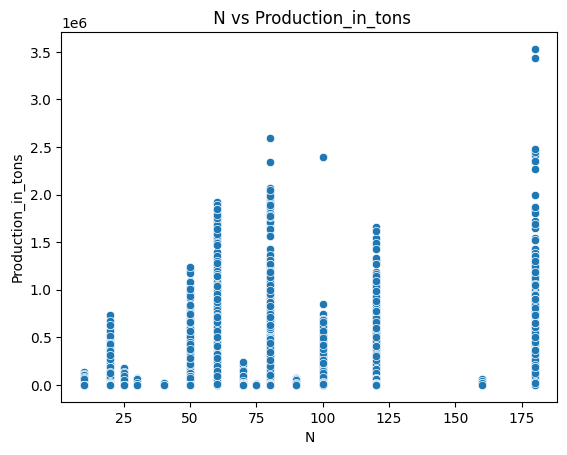

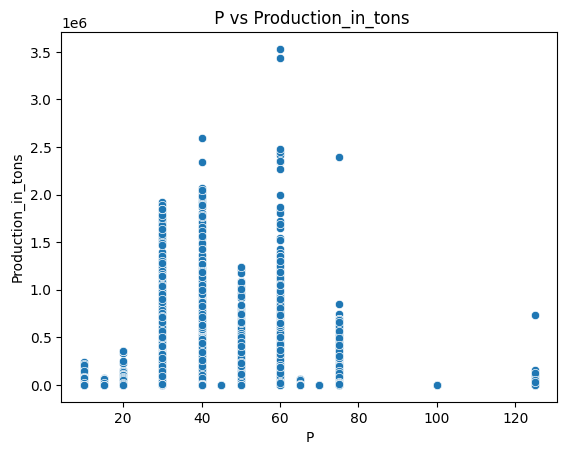

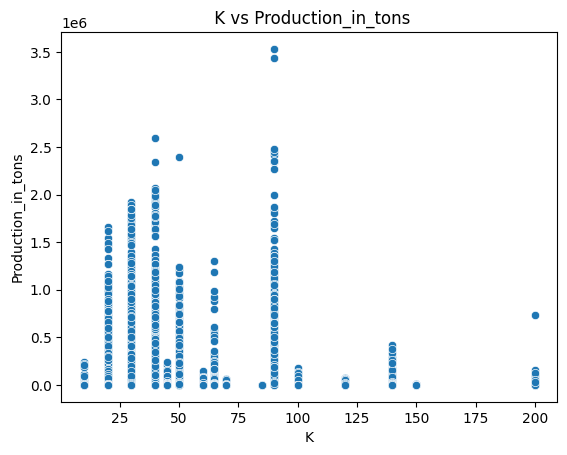

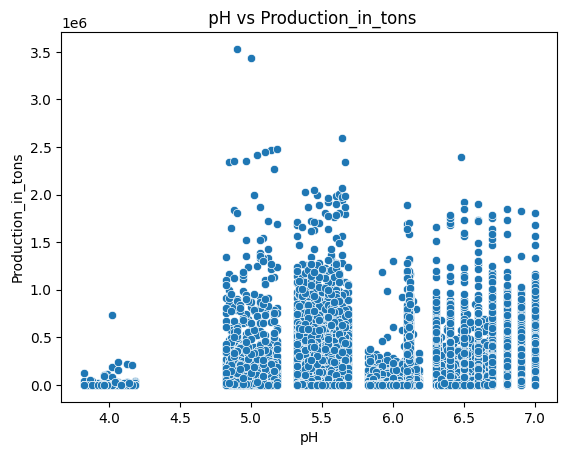

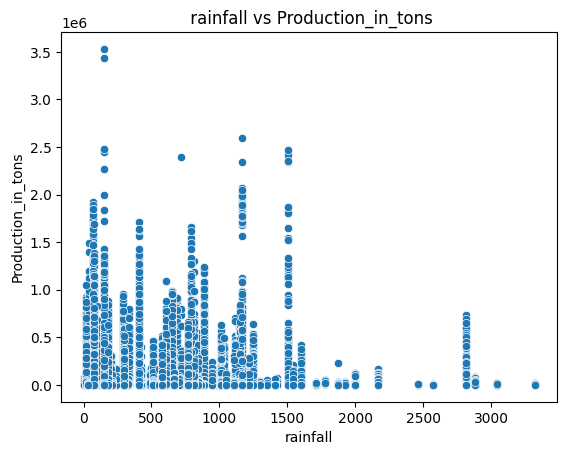

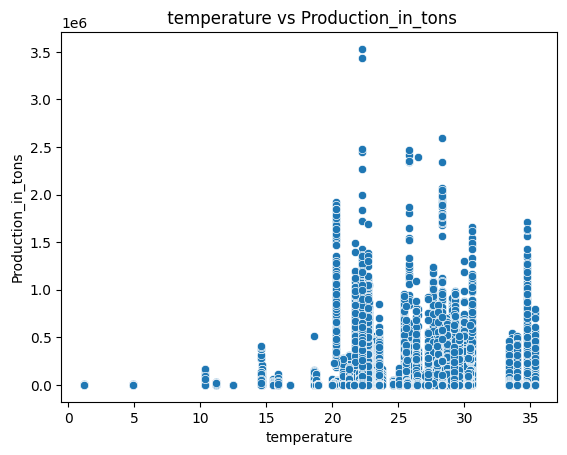

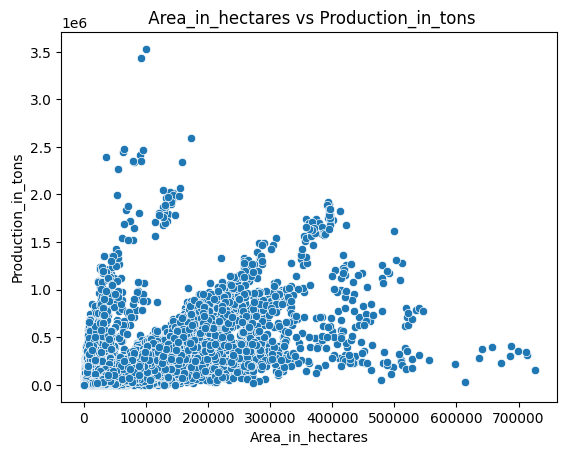

In [ ]:
# Bivariate Analysis of attributes

# Bivariate analysis for numerical attributes
def plot_bivariate_analysis(attribute):
    sns.scatterplot(data=data, x=attribute, y='Production_in_tons')
    plt.title(f' {attribute} vs Production_in_tons')
    plt.xlabel(attribute)
    plt.ylabel('Production_in_tons')
    plt.show()

# List of attributes to perform bivariate analysis
attributes = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares']

for attribute in attributes:
    plot_bivariate_analysis(attribute)

*From the above plotted graphs the inferences are:*

**N vs Production_in_tons:** The graph depicting the relationship between nitrogen (N) levels and production in tons reveals that within the nitrogen level range of 75 to 95, there is a notable increase in production volume.

**P vs Production_in_tons:** The graph illustrating the relationship between phosphorous(P) and production in tons levels. Interestingly, the ranges of phosphorous levels from 25 to 40 and 60 to 65 are the two main ranges where the output volume increases significantly.

**K vs Production_in_tons:** The graph showing the association between potassium (K) levels and production in tons. It indicates that there is a discernible rise in production volume in the ranges of 30 to 45 and 80 to 90 of potassium.

**pH vs Production_in_tons:** The graph illustrating the relationship between pH levels and production in tons. Within the pH range of 4.8 to 5.2, there's a notable increase in production volume, indicating a significant trend.

**Rainfall vs Production_in_tons:** The graph illustrates two significant ranges where production volume notably increases: 0 to 250 mm and 1100 to 1200 mm of rainfall.

**Temperature vs Production_in_tons:** The graph that shows the relationship between temperature and production in tons. It shows that when the temperature rises to between 25 and 35 degrees Celsius, production volume increases.

**Area_in_hectares vs Production_in_tons:** The graph indicates that average production is found between 100,000 and 200,000 hectares of area, whereas higher production is found between 0 and 100,000 hectares of area.

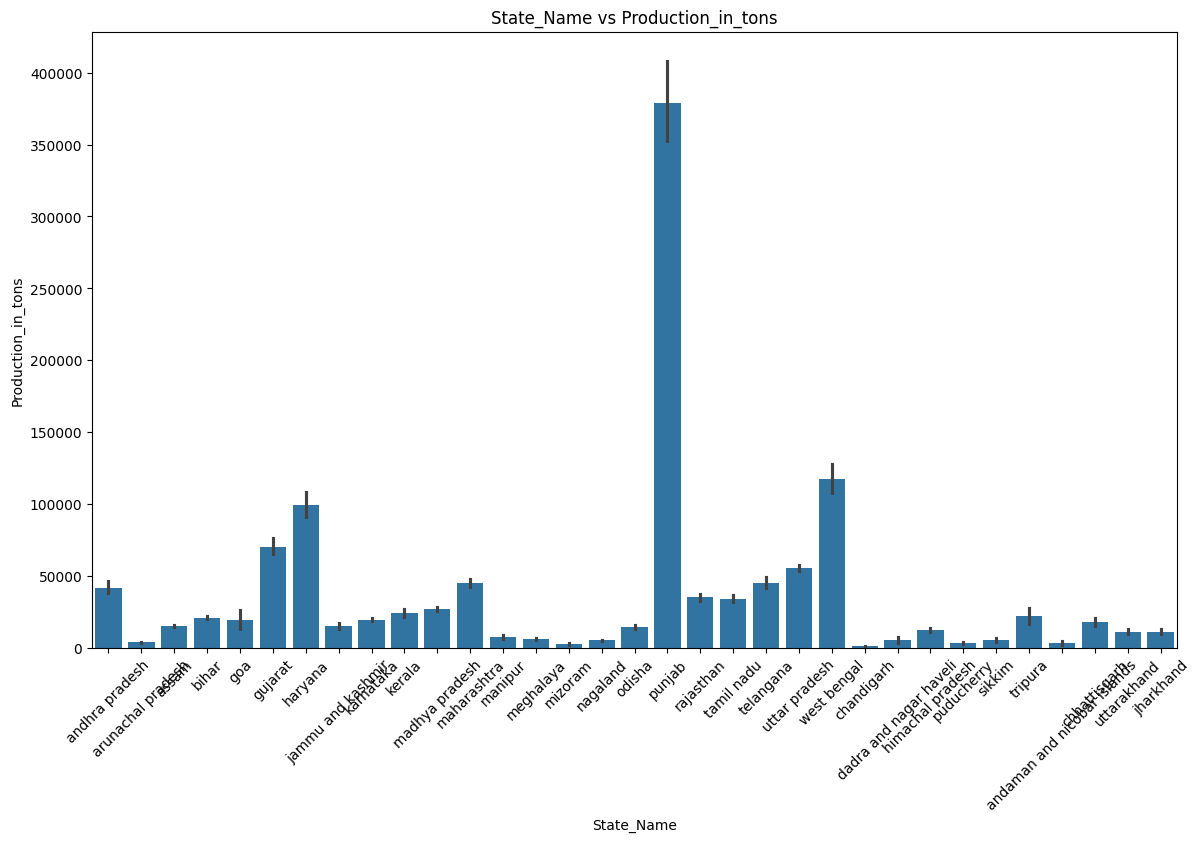

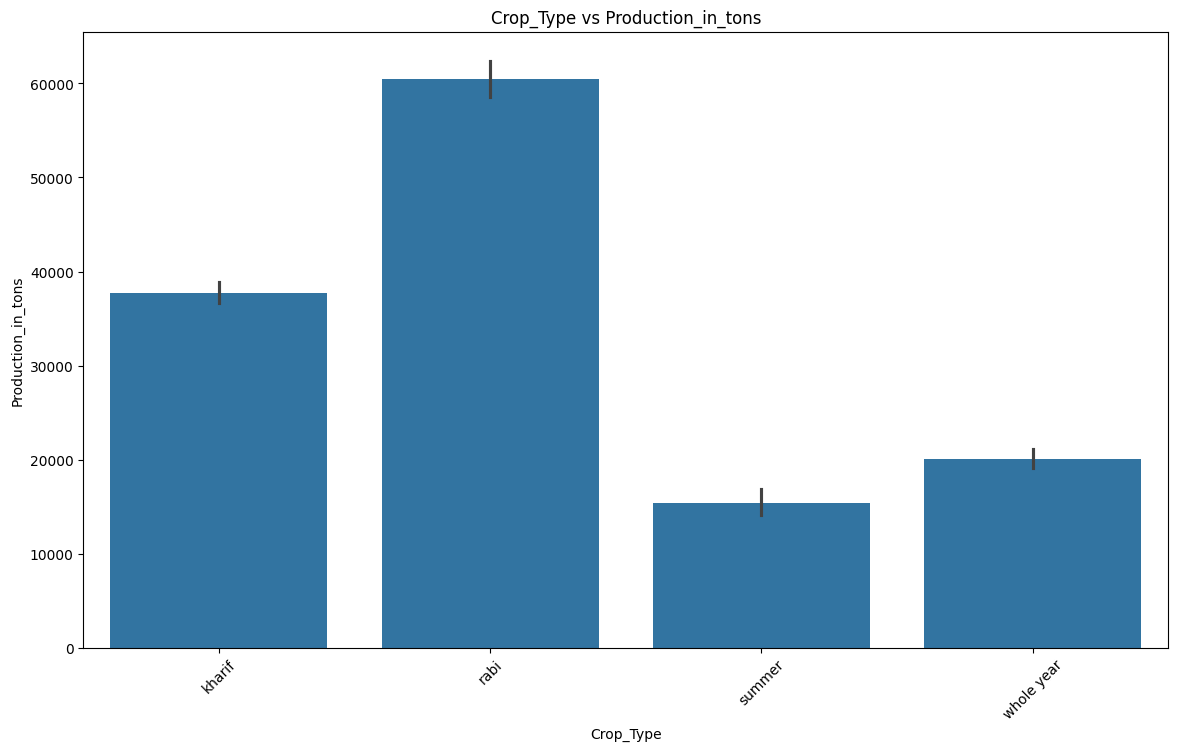

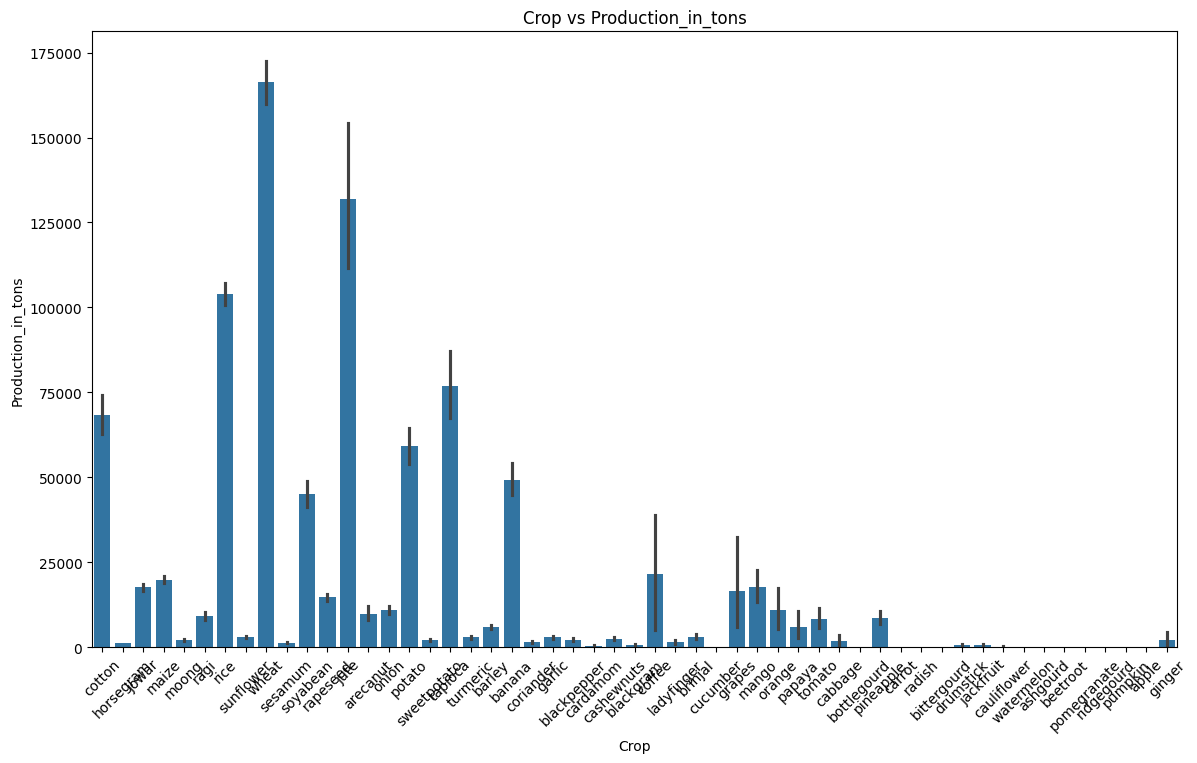

In [ ]:
# Bivariate analysis for categorical attributes

def plot_categorical_bivariate_analysis(attribute):
    plt.figure(figsize=(14, 8))
    sns.barplot(data=data, x=attribute, y='Production_in_tons')
    plt.title(f'{attribute} vs Production_in_tons')
    plt.xlabel(attribute)
    plt.ylabel('Production_in_tons')
    plt.xticks(rotation=45)
    plt.show()

# List of categorical attributes to perform bivariate analysis
categorical_attributes = ['State_Name', 'Crop_Type', 'Crop']

for attribute in categorical_attributes:
    plot_categorical_bivariate_analysis(attribute)

*From the above plotted graphs the inferences are:*

**State_Name vs Production in tons:** The states Punjab and Uttarpradesh have large production volume compare to other states.

**Crop_Type vs Production_in_tons:** Compared to other seasons, kharif and rabi have higher production volumes.

**Crop vs Production_in_tons:** The crop vs. production_in_tons graph shows that the production of potatoes, rice, wheat are higher than other crops.

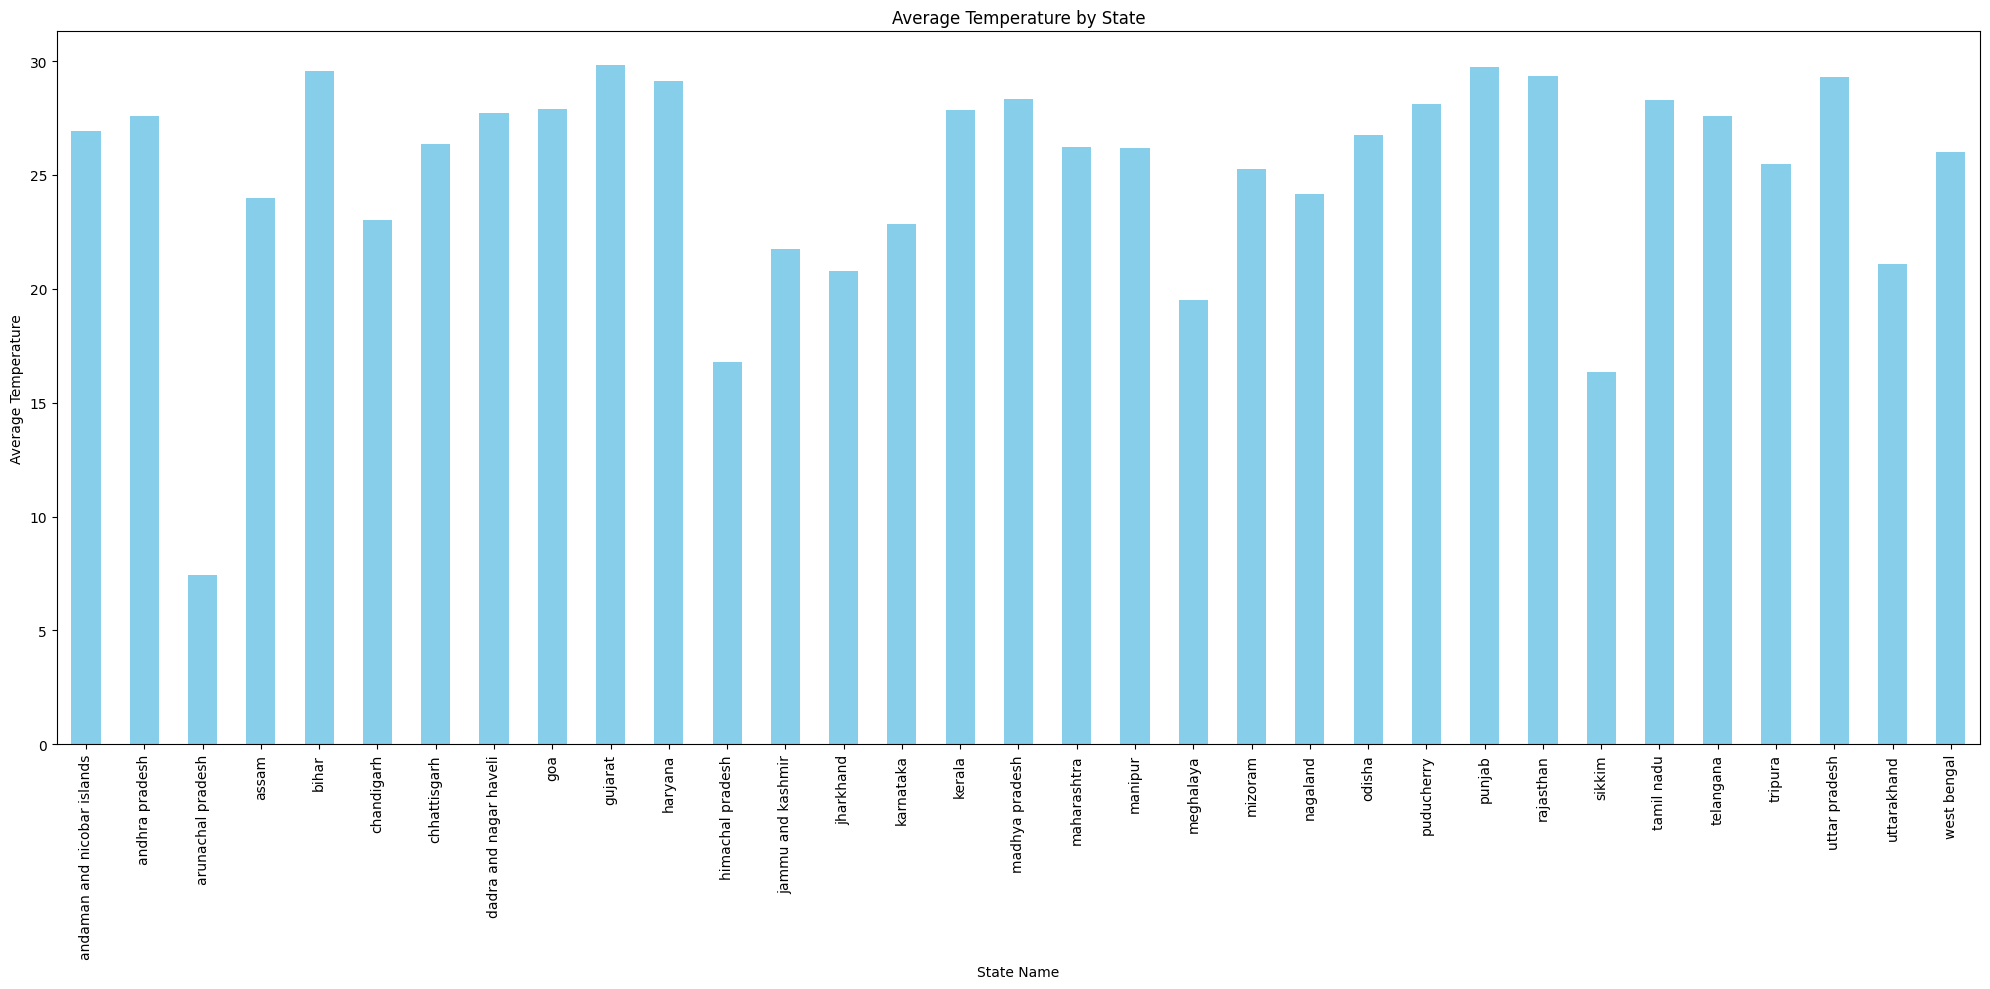

In [ ]:
# Grouping the data by State_Name and calculating the mean temperature for each state
grouped_data = data.groupby('State_Name')['temperature'].mean()

# Plotting bar graph
plt.figure(figsize=(20, 10))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by State')
plt.xlabel('State Name')
plt.ylabel('Average Temperature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*From the above plotted graph the inferences are:*

*Bihar, Gujarat, Haryana, Punjab, Rajasthan and Uttar Pradesh are the states with the highest recorded average temperatures.*

*Arunachal Pradesh, Himachal Pradesh and Sikkim are the states with the lowest recorded average temperatures.*

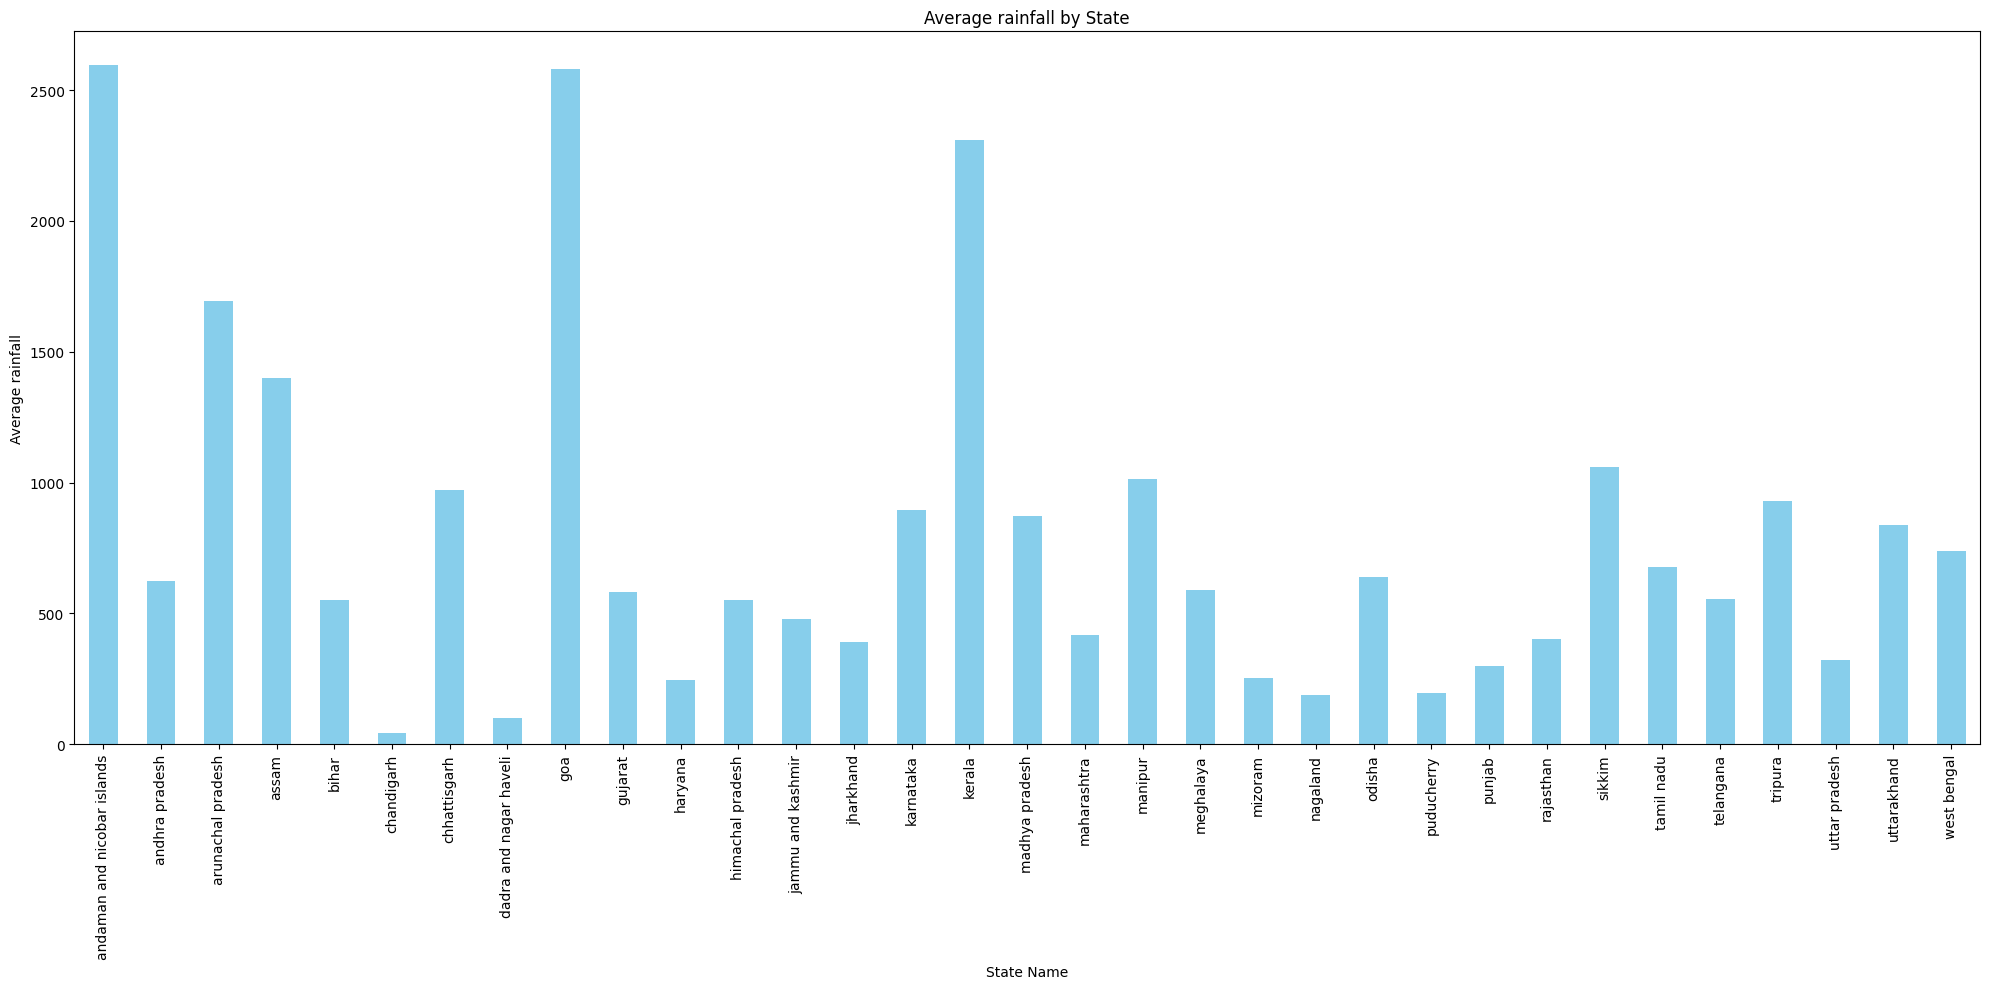

In [ ]:
# Grouping the data by State_Name and calculating the mean rainfall for each state
grouped_data1 = data.groupby('State_Name')['rainfall'].mean()

# Plotting bar graph
plt.figure(figsize=(20, 10))
grouped_data1.plot(kind='bar', color='skyblue')
plt.title('Average rainfall by State')
plt.xlabel('State Name')
plt.ylabel('Average rainfall')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*From the above plotted graph the inferences are:*

*Andaman and Nicobar islands, Goa, Kerala and Arunachal Pradesh are the states with the highest recorded average rainfall.*

*Chandigarh, Dadra and Nagar Haveli, Nagaland,Pudicherry are the states and union territories with the lowest recorded average rainfall.*

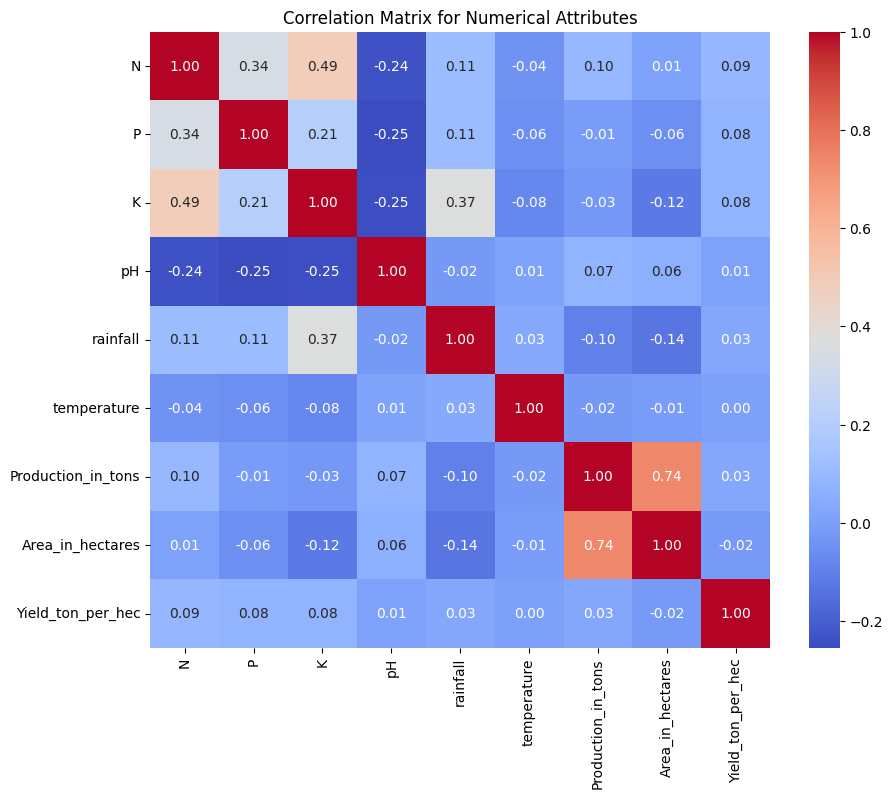

In [ ]:
# Multivariate Analysis of attributes
numerical_attributes1 = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Production_in_tons','Area_in_hectares','Yield_ton_per_hec']
# Correlation matrix for numerical attributes
correlation_matrix = data[numerical_attributes1].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Attributes')
plt.show()

**Correlation:** It is a statistical measure that describes the extent to which two variables change together. It quantifies the strength and direction of the relationship between two variables.The correlation coefficient, denoted by r, ranges from -1 to +1.There are different types of correlation such as Strong Positive Correlation, Strong Negative Correlation, Weak Positive Correlation, Weak Negavtive Correlation or No Correlation.

The correlation between production in tons and nitrogen is described as a weak positive correlation, with a correlation coefficient value of 0.10. It says that if the N content increases, then production will also increase slightly.

The correlation between production in tons and Phosporous is described as a weak negative correlation, with a correlation coefficient value of -0.01. It says that if the P content increases, then production will decrease slightly.

The correlation between production in tons and Potassium is described as a weak negative correlation, with a correlation coefficient value of -0.03. It says that if the K content increases, then production will decrease.

The correlation between production in tons and pH value is described as a weak positive correlation, with a correlation coefficient value of 0.07. It says that if the pH content increases, then production will also increase slightly.

The correlation between production in tons and rainfall is described as a weak negative correlation, with a correlation coefficient value of -0.10. It says that if the rainfall increases more, then production will decrease slightly.

The correlation between production in tons and temperature is described as a weak negative correlation, with a correlation coefficient value of -0.02. It says that if the temperature increases, then production will decrease slightly.

The correlation between production in tons and Area_in_hectares is described as a positive correlation, with a correlation coefficient value of 0.74. It says that if the Area_in_hectares increases, then production will also increase.

The correlation between production in tons and Yield_ton_per_hec is described as a weak positive correlation, with a correlation coefficient value of 0.03. It says that if the production_in_tons increases, then yield_ton_per-hec will also increase slightly.


In [ ]:
# Feature Creation
# NPK Ratio
data['NPK_Ratio'] = data['N'] / (data['P'] + data['K'])

# Temperature-Rainfall Interaction
data['Temp_Rainfall_Interaction'] = data['temperature'] * data['rainfall']

# Display the updated dataset with derived features
data.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,NPK_Ratio,Temp_Rainfall_Interaction
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,2.000000,19150.350667
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,0.250000,19150.350667
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,1.000000,19150.350667
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,1.333333,19150.350667
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,0.333333,19150.350667


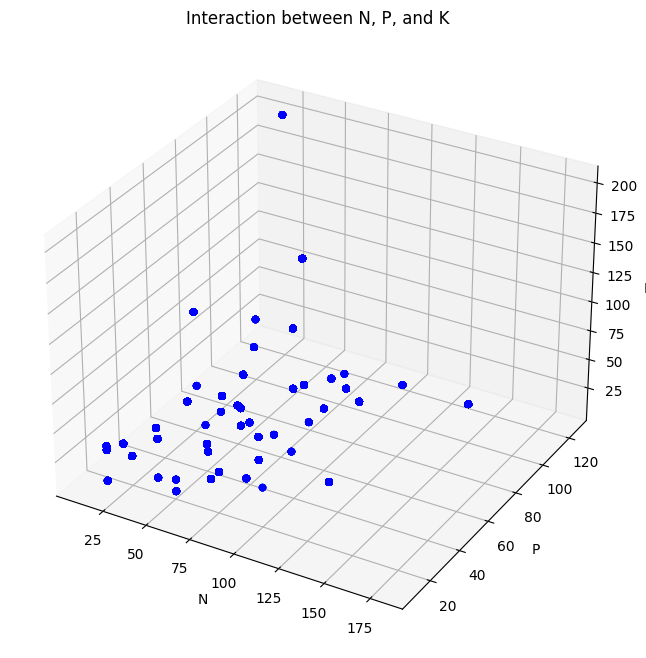

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Extracting N, P, and K values
N = data['N']
P = data['P']
K = data['K']

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(N, P, K, c='b', marker='o')

# Setting labels and title
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')
ax.set_title('Interaction between N, P, and K')

plt.show()


**Feature Creation:**
It is the process of creating new features (variables) from existing ones in a dataset to improve the performance of machine learning models.

**NPK Ratio:**  The balance of nitrogen, phosphorus, and potassium nutrients in the soil is crucial for plant growth and yield. Therefore, creating a feature representing the NPK ratio could be highly important, as it directly reflects soil fertility and nutrient availability, which are fundamental factors influencing crop productivity.

**Temperature_Rainfall Intercation:**
Climate conditions such as rainfall, temperature, and seasonal variations can have a significant impact on crop growth and yield. Features derived from weather patterns, such as temperature-rainfall interactions can provide valuable insights into how weather influences agricultural outcomes and are therefore important for predicting crop yields accurately.

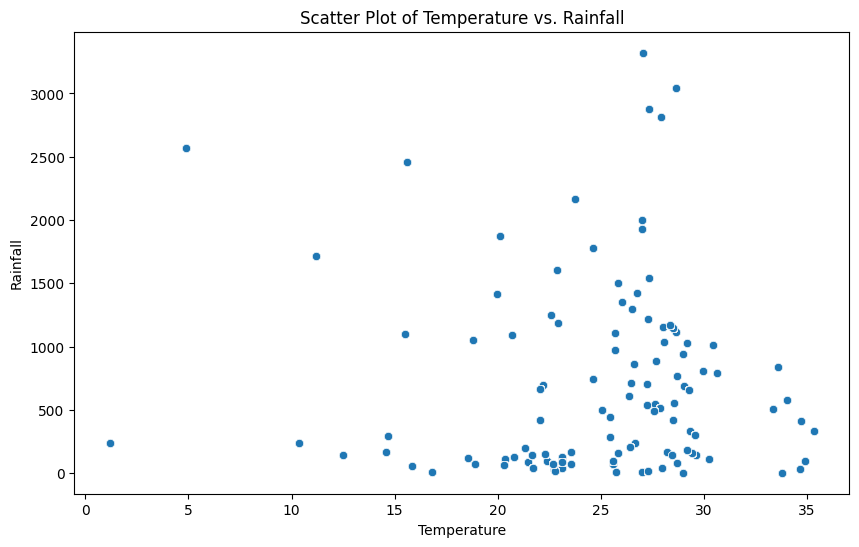

<ipython-input-29-4a4f605ead59>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='rainfall', y='temperature', data=data, ci=None)


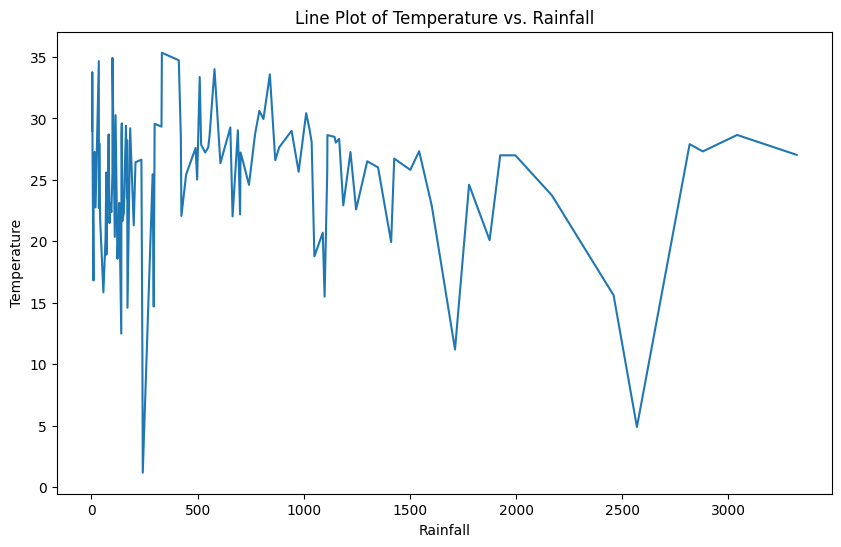

In [ ]:
# Scatter plot of temperature vs. rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='rainfall', data=data)
plt.title('Scatter Plot of Temperature vs. Rainfall')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.show()

# Line plot showing how temperature varies with rainfall
plt.figure(figsize=(10, 6))
sns.lineplot(x='rainfall', y='temperature', data=data, ci=None)
plt.title('Line Plot of Temperature vs. Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Categorical columns to one-hot encode
categorical_columns = ["State_Name", "Crop_Type", "Crop"]

# Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns)
encoded_data.head()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,...,Crop_ridgegourd,Crop_sesamum,Crop_soyabean,Crop_sunflower,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat
0,0,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,...,False,False,False,False,False,False,False,False,False,False
1,1,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,...,False,False,False,False,False,False,False,False,False,False
2,2,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,...,False,False,False,False,False,False,False,False,False,False
3,3,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,...,False,False,False,False,False,False,False,False,False,False
4,4,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,...,False,False,False,False,False,False,False,False,False,False


**One-Hot Encoding:** One-hot encoding is a technique used to represent categorical variables as binary vectors. It preserves the distinctness of categories without imposing any ordinal relationship. It also prevents the algorithm from assuming a false ordinal relationship among categories.

In [ ]:
# Split data into features and target variable
X = encoded_data.drop(['Production_in_tons'], axis=1)  # Features
y = encoded_data['Production_in_tons']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("Root Mean Squared Error:", rf_rmse)

Random Forest:
Mean Squared Error: 47674917.95146866
R-squared: 0.9967375433339981
Root Mean Squared Error: 6904.702596887766


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost:")
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)
print("Root Mean Squared Error:", xgb_rmse)

XGBoost:
Mean Squared Error: 100390639.65576634
R-squared: 0.9931301379085213
Root Mean Squared Error: 10019.512945037115


In [ ]:
from lightgbm import LGBMRegressor
import re

# Replace special characters in feature names with underscores
X_train.columns = [re.sub(r'\W+', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'\W+', '_', col) for col in X_test.columns]

# Train LightGBM model
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions and evaluate
lgb_y_pred = lgb_model.predict(X_test)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

print("LightGBM:")
print("Mean Squared Error:", lgb_mse)
print("R-squared:", lgb_r2)
print("Root Mean Squared Error:", lgb_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1448
[LightGBM] [Info] Number of data points in the train set: 79879, number of used features: 95
[LightGBM] [Info] Start training from score 37829.423941
LightGBM:
Mean Squared Error: 89187286.79497373
R-squared: 0.9938967979216433
Root Mean Squared Error: 9443.902095795664


In [ ]:
# Apply logarithmic transformation
log_transformed_data = data.copy()
log_transformed_data[numerical_attributes] = log_transformed_data[numerical_attributes].apply(lambda x: np.log1p(x))
log_transformed_data.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,NPK_Ratio,Temp_Rainfall_Interaction
0,0,andhra pradesh,kharif,cotton,4.795791,3.713572,3.044522,1.865629,6.485154,3.410047,7300.0,9.148571,1.287671,2.000000,19150.350667
1,1,andhra pradesh,kharif,horsegram,3.044522,4.110874,3.044522,1.971299,6.485154,3.410047,3300.0,6.908755,0.303030,0.250000,19150.350667
2,2,andhra pradesh,kharif,jowar,4.394449,3.713572,3.713572,1.859418,6.485154,3.410047,10100.0,9.230241,1.009901,1.000000,19150.350667
3,3,andhra pradesh,kharif,maize,4.394449,3.713572,3.044522,1.890095,6.485154,3.410047,2800.0,8.497195,1.750000,1.333333,19150.350667
4,4,andhra pradesh,kharif,moong,3.044522,3.713572,3.044522,1.899118,6.485154,3.410047,1300.0,6.216606,0.384615,0.333333,19150.350667


**Logarithamic Transformation:** Logarithmic transformation is a mathematical operation applied to a variable, typically used to adjust the scale of the data or to stabilize the variance across the data points. It involves taking the logarithm of each data point. It is particularly useful when the data is highly skewed or when the variance increases with the mean of the data.

In [ ]:
# Apply square root transformation
sqrt_transformed_data = data.copy()
sqrt_transformed_data[numerical_attributes] = sqrt_transformed_data[numerical_attributes].apply(np.sqrt)
sqrt_transformed_data.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,NPK_Ratio,Temp_Rainfall_Interaction
0,0,andhra pradesh,kharif,cotton,10.954451,6.324555,4.472136,2.336664,25.58007,5.409868,7300.0,96.953597,1.287671,2.000000,19150.350667
1,1,andhra pradesh,kharif,horsegram,4.472136,7.745967,4.472136,2.485961,25.58007,5.409868,3300.0,31.622777,0.303030,0.250000,19150.350667
2,2,andhra pradesh,kharif,jowar,8.944272,6.324555,6.324555,2.328089,25.58007,5.409868,10100.0,100.995049,1.009901,1.000000,19150.350667
3,3,andhra pradesh,kharif,maize,8.944272,6.324555,4.472136,2.370654,25.58007,5.409868,2800.0,70.000000,1.750000,1.333333,19150.350667
4,4,andhra pradesh,kharif,moong,4.472136,6.324555,4.472136,2.383275,25.58007,5.409868,1300.0,22.360680,0.384615,0.333333,19150.350667


**Square Root Transformatin:** Square root transformation is a mathematical operation applied to a variable, used to adjust the scale of the data or to stabilize the variance across the data points. It involves taking the square root of each data point.It is particularly useful when the data is right-skewed (positively skewed) and contains many small values.

In [ ]:
from scipy.stats import boxcox
# Apply Box-Cox transformation
boxcox_transformed_data = data.copy()
for column in numerical_attributes:
    boxcox_transformed_data[column], _ = boxcox(boxcox_transformed_data[column] + 1)
boxcox_transformed_data.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,NPK_Ratio,Temp_Rainfall_Interaction
0,0,andhra pradesh,kharif,cotton,14.419214,31.434766,1.261027,0.576018,20.855396,305.969637,7300.0,9.932352,1.287671,2.000000,19150.350667
1,1,andhra pradesh,kharif,horsegram,5.924383,45.663210,1.261027,0.580421,20.855396,305.969637,3300.0,7.349716,0.303030,0.250000,19150.350667
2,2,andhra pradesh,kharif,jowar,11.921115,31.434766,1.324775,0.575734,20.855396,305.969637,10100.0,10.028473,1.009901,1.000000,19150.350667
3,3,andhra pradesh,kharif,maize,11.921115,31.434766,1.261027,0.577107,20.855396,305.969637,2800.0,9.170672,1.750000,1.333333,19150.350667
4,4,andhra pradesh,kharif,moong,5.924383,31.434766,1.261027,0.577498,20.855396,305.969637,1300.0,6.572153,0.384615,0.333333,19150.350667


**Box- Cox Transformation:** The Box-Cox transformation is a transformation that can be applied to non-normal data to stabilize variance and make the data more normally distributed. It is particularly useful when dealing with non-normal data in statistical modeling and analysis.Non-normal data refers to data that does not follow a normal distribution.

In [ ]:
# Categorical columns to one-hot encode
categorical_columns = ["State_Name", "Crop_Type", "Crop"]

# Perform one-hot encoding
encoded_data1 = pd.get_dummies(log_transformed_data, columns=categorical_columns)
encoded_data1.head()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,...,Crop_ridgegourd,Crop_sesamum,Crop_soyabean,Crop_sunflower,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat
0,0,4.795791,3.713572,3.044522,1.865629,6.485154,3.410047,7300.0,9.148571,1.287671,...,False,False,False,False,False,False,False,False,False,False
1,1,3.044522,4.110874,3.044522,1.971299,6.485154,3.410047,3300.0,6.908755,0.303030,...,False,False,False,False,False,False,False,False,False,False
2,2,4.394449,3.713572,3.713572,1.859418,6.485154,3.410047,10100.0,9.230241,1.009901,...,False,False,False,False,False,False,False,False,False,False
3,3,4.394449,3.713572,3.044522,1.890095,6.485154,3.410047,2800.0,8.497195,1.750000,...,False,False,False,False,False,False,False,False,False,False
4,4,3.044522,3.713572,3.044522,1.899118,6.485154,3.410047,1300.0,6.216606,0.384615,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Split data into features and target variable
X = encoded_data1.drop(['Production_in_tons','Unnamed: 0','Yield_ton_per_hec'], axis=1)  # Features
y = encoded_data1['Production_in_tons']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model1.fit(X_train, y_train)

# Make predictions and evaluate
rf_y_pred = rf_model1.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("Root Mean Squared Error:", rf_rmse)

Random Forest:
Mean Squared Error: 0.2959370907465698
R-squared: 0.9691943649259468
Root Mean Squared Error: 0.544001002523497


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model1 = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model1.fit(X_train, y_train)

# Make predictions and evaluate
xgb_y_pred = xgb_model1.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost:")
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)
print("Root Mean Squared Error:", xgb_rmse)

XGBoost:
Mean Squared Error: 0.2592662701164305
R-squared: 0.9730116218819718
Root Mean Squared Error: 0.5091819616958465


In [ ]:
from lightgbm import LGBMRegressor
import re

# Replace special characters in feature names with underscores
X_train.columns = [re.sub(r'\W+', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'\W+', '_', col) for col in X_test.columns]

# Train LightGBM model
lgb_model1 = LGBMRegressor(random_state=42)
lgb_model1.fit(X_train, y_train)

# Make predictions and evaluate
lgb_y_pred = lgb_model1.predict(X_test)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

print("LightGBM:")
print("Mean Squared Error:", lgb_mse)
print("R-squared:", lgb_r2)
print("Root Mean Squared Error:", lgb_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 79879, number of used features: 93
[LightGBM] [Info] Start training from score 7.282749
LightGBM:
Mean Squared Error: 0.31459626964762105
R-squared: 0.9672520336873813
Root Mean Squared Error: 0.5608888211112975


In [ ]:
# Categorical columns to one-hot encode
categorical_columns = ["State_Name", "Crop_Type", "Crop"]

# Perform one-hot encoding
encoded_data2 = pd.get_dummies(sqrt_transformed_data, columns=categorical_columns)
encoded_data2.head()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,...,Crop_ridgegourd,Crop_sesamum,Crop_soyabean,Crop_sunflower,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat
0,0,10.954451,6.324555,4.472136,2.336664,25.58007,5.409868,7300.0,96.953597,1.287671,...,False,False,False,False,False,False,False,False,False,False
1,1,4.472136,7.745967,4.472136,2.485961,25.58007,5.409868,3300.0,31.622777,0.303030,...,False,False,False,False,False,False,False,False,False,False
2,2,8.944272,6.324555,6.324555,2.328089,25.58007,5.409868,10100.0,100.995049,1.009901,...,False,False,False,False,False,False,False,False,False,False
3,3,8.944272,6.324555,4.472136,2.370654,25.58007,5.409868,2800.0,70.000000,1.750000,...,False,False,False,False,False,False,False,False,False,False
4,4,4.472136,6.324555,4.472136,2.383275,25.58007,5.409868,1300.0,22.360680,0.384615,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Split data into features and target variable
X = encoded_data2.drop(['Production_in_tons','Unnamed: 0','Yield_ton_per_hec'], axis=1)  # Features
y = encoded_data2['Production_in_tons']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train, y_train)

# Make predictions and evaluate
rf_y_pred = rf_model2.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("Root Mean Squared Error:", rf_rmse)

Random Forest:
Mean Squared Error: 985.598500597671
R-squared: 0.9627438654464535
Root Mean Squared Error: 31.394243112355344


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model2 = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model2.fit(X_train, y_train)

# Make predictions and evaluate
xgb_y_pred = xgb_model2.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost:")
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)
print("Root Mean Squared Error:", xgb_rmse)

XGBoost:
Mean Squared Error: 934.2171565376013
R-squared: 0.9646861069034801
Root Mean Squared Error: 30.56496616287349


In [ ]:
from lightgbm import LGBMRegressor
import re

# Replace special characters in feature names with underscores
X_train.columns = [re.sub(r'\W+', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'\W+', '_', col) for col in X_test.columns]

# Train LightGBM model
lgb_model2 = LGBMRegressor(random_state=42)
lgb_model2.fit(X_train, y_train)

# Make predictions and evaluate
lgb_y_pred = lgb_model2.predict(X_test)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

print("LightGBM:")
print("Mean Squared Error:", lgb_mse)
print("R-squared:", lgb_r2)
print("Root Mean Squared Error:", lgb_rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 79879, number of used features: 93
[LightGBM] [Info] Start training from score 105.789844
LightGBM:
Mean Squared Error: 1010.5257654333539
R-squared: 0.9618016019058668
Root Mean Squared Error: 31.78876791310657


In [ ]:
# Categorical columns to one-hot encode
categorical_columns = ["State_Name", "Crop_Type", "Crop"]

# Perform one-hot encoding
encoded_data3 = pd.get_dummies(boxcox_transformed_data, columns=categorical_columns)
encoded_data3.head()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,...,Crop_ridgegourd,Crop_sesamum,Crop_soyabean,Crop_sunflower,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat
0,0,14.419214,31.434766,1.261027,0.576018,20.855396,305.969637,7300.0,9.932352,1.287671,...,False,False,False,False,False,False,False,False,False,False
1,1,5.924383,45.663210,1.261027,0.580421,20.855396,305.969637,3300.0,7.349716,0.303030,...,False,False,False,False,False,False,False,False,False,False
2,2,11.921115,31.434766,1.324775,0.575734,20.855396,305.969637,10100.0,10.028473,1.009901,...,False,False,False,False,False,False,False,False,False,False
3,3,11.921115,31.434766,1.261027,0.577107,20.855396,305.969637,2800.0,9.170672,1.750000,...,False,False,False,False,False,False,False,False,False,False
4,4,5.924383,31.434766,1.261027,0.577498,20.855396,305.969637,1300.0,6.572153,0.384615,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Split data into features and target variable
X = encoded_data3.drop(['Production_in_tons','Unnamed: 0','Yield_ton_per_hec'], axis=1)  # Features
y = encoded_data3['Production_in_tons']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model3.fit(X_train, y_train)

# Make predictions and evaluate
rf_y_pred = rf_model3.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("Root Mean Squared Error:", rf_rmse)

Random Forest:
Mean Squared Error: 0.366050610616912
R-squared: 0.970432428474942
Root Mean Squared Error: 0.6050211654288733


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model3 = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model3.fit(X_train, y_train)

# Make predictions and evaluate
xgb_y_pred = xgb_model3.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost:")
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)
print("Root Mean Squared Error:", xgb_rmse)

XGBoost:
Mean Squared Error: 0.32903495133668803
R-squared: 0.9734223515117338
Root Mean Squared Error: 0.573615682610481


In [ ]:
from lightgbm import LGBMRegressor
import re

# Replace special characters in feature names with underscores
X_train.columns = [re.sub(r'\W+', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'\W+', '_', col) for col in X_test.columns]

# Train LightGBM model
lgb_model3 = LGBMRegressor(random_state=42)
lgb_model3.fit(X_train, y_train)

# Make predictions and evaluate
lgb_y_pred = lgb_model3.predict(X_test)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

print("LightGBM:")
print("Mean Squared Error:", lgb_mse)
print("R-squared:", lgb_r2)
print("Root Mean Squared Error:", lgb_rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 79879, number of used features: 93
[LightGBM] [Info] Start training from score 7.870054
LightGBM:
Mean Squared Error: 0.39057751898443244
R-squared: 0.96845127861093
Root Mean Squared Error: 0.6249620140331991


In [ ]:
# Get the feature names used during model training
feature_names = X.columns.tolist()

# Create a dictionary to store user input for each feature
new_data = {}

# Ask user to enter values for each feature
print("Please enter the values for each feature:")
for feature in feature_names:
    if not feature.startswith(('Crop_', 'Crop_Type_', 'State_Name_')):
        value = float(input(f"{feature}: "))  # Convert input to float if necessary

        # Apply logarithmic transformation if needed
        if feature in ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares', 'NPK_Ratio', 'Temp_Rainfall_Interaction']:
            value = np.log(value + 1)  # Adding 1 to avoid log(0)

        new_data[feature] = value

# Ask user to enter the categorical variables
crop_name = input("Crop: ")
state_name = input("State_Name: ")
crop_type = input("Crop_Type: ")

# Map the categorical variables to the corresponding one-hot encoded column
crop_column = f"Crop_{crop_name.lower()}"
crop_type_column = f"Crop_Type_{crop_type.lower()}"
state_name_column = f"State_Name_{state_name.lower()}"

# Set the mapped columns to 1
new_data[crop_column] = 1 if crop_column in feature_names else 0
new_data[crop_type_column] = 1 if crop_type_column in feature_names else 0
new_data[state_name_column] = 1 if state_name_column in feature_names else 0

# Set all other one-hot encoded columns to 0
for column in feature_names:
    if column.startswith(('Crop_', 'Crop_Type_', 'State_Name_')):
        if column not in [crop_column, crop_type_column, state_name_column]:
            new_data[column] = 0

# Convert the dictionary into a DataFrame with a single row
new_data_df = pd.DataFrame([new_data])

# Reorder DataFrame columns based on feature names
new_data_df = new_data_df[feature_names]

# Make predictions on new data
new_predictions = rf_model1.predict(new_data_df)

# Print the predicted crop yield
print("Predicted crop yield:", new_predictions[0])

Please enter the values for each feature:
N: 80
P: 40
K: 20
pH: 5.62
rainfall: 654.34
temperature: 29.266667
Area_in_hectares: 2800.0
NPK_Ratio: 1.3333333
Temp_Rainfall_Interaction: 19150.350667
Crop: maize
State_Name: andhra pradesh
Crop_Type: kharif
Predicted crop yield: 2.755817266498499


In [ ]:
from joblib import dump
model_filename = "rf_model1.joblib"
dump(rf_model1, model_filename)
print(f"Trained model saved as {model_filename}")

Trained model saved as rf_model1.joblib


In [ ]:
from joblib import dump
model_filename = "xgb_model1.joblib"
dump(xgb_model1, model_filename)
print(f"Trained model saved as {model_filename}")

Trained model saved as xgb_model1.joblib
